In [1]:
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')
wipro= yf.download("WIT",period="10y")

[*********************100%%**********************]  1 of 1 completed


In [2]:
wipro.to_csv("WIT.csv")

In [3]:
wipro

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-27,6.41,6.475,6.360,6.375,6.008045,807400
2014-01-28,6.43,6.550,6.420,6.520,6.144699,671000
2014-01-29,6.47,6.540,6.425,6.440,6.069303,858600
2014-01-30,6.50,6.595,6.465,6.530,6.154122,748200
2014-01-31,6.47,6.515,6.400,6.470,6.097576,955800
...,...,...,...,...,...,...
2024-01-22,5.75,5.790,5.720,5.750,5.738000,2507300
2024-01-23,5.62,5.700,5.620,5.680,5.680000,2710400
2024-01-24,5.80,5.800,5.740,5.750,5.750000,2166600


In [ ]:
#wipro['Returns'] = wipro['Adj Close'].pct_change()

In [ ]:
#wipro

In [ ]:
#wipro.dropna(inplace=True)

In [ ]:
#wipro

In [ ]:
#wipro["Returns"].std()*100

In [ ]:
#wipro["Returns"].mean()*100

In [ ]:
#import scipy.stats as stats
#wipro['Returns_zscore'] = stats.zscore(wipro['Returns'])

In [ ]:
#import matplotlib.pyplot as plt

In [ ]:
#plt.hist(wipro["Returns_zscore"])
#plt.grid()
#plt.show()

In [ ]:
#wipro["Returns_zscore"].plot(figsize=(20,10))
#plt.grid()
#plt.axhline(-3, color='r')
#plt.axhline(0, color='green')
#plt.axhline(3, color='r')

In [ ]:
#wipro["Open"].plot(figsize=(20,10))
#plt.grid()
#plt.show()

In [4]:
df = wipro[['Close']]
df

,Close
Date,
2014-01-27,6.375
2014-01-28,6.520
2014-01-29,6.440
2014-01-30,6.530
2014-01-31,6.470
...,...
2024-01-22,5.750
2024-01-23,5.680
2024-01-24,5.750


In [5]:
df.dropna(inplace=True)

In [6]:
df1=df

In [7]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))

In [8]:
print(df.shape)

(2518, 1)


In [9]:
##splitting dataset into train and test split
training_size=int(len(df)*0.80)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [10]:
training_size,test_size

(2014, 504)

In [11]:
train_data.shape
test_data.shape

(504, 1)

In [12]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        print(a)
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [13]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

[0.51558267 0.53523037 0.52439027 0.53658541 0.52845527 0.50271007
 0.5115176  0.50135503 0.51084015 0.52235777 0.52235777 0.52235777
 0.5182927  0.52506779 0.53048784 0.53387539 0.53387539 0.53997289
 0.55149052 0.57994581 0.58401087 0.61246616 0.61246616 0.5867209
 0.57994581 0.60907862 0.6084011  0.61111112 0.58401087 0.57655826
 0.56842818 0.56029811 0.53455285 0.52303522 0.53929544 0.54945801
 0.53658541 0.53590789 0.54065042 0.53387539 0.53929544 0.53590789
 0.52710029 0.54268292 0.55962059 0.58197831 0.58536585 0.56436318
 0.54674799 0.55149052 0.54878049 0.55826561 0.53861791 0.54607047
 0.54742551 0.56775073 0.58062333 0.57384823 0.54268292 0.498645
 0.46409214 0.45799457 0.45121954 0.46680217 0.46273716 0.46205964
 0.46002714 0.46680217 0.45867209 0.44918704 0.43360435 0.44376693
 0.45663959 0.46951219 0.46205964 0.45325204 0.44715447 0.43766942
 0.42005423 0.42208673 0.4193767  0.40921413 0.4302168  0.43495939
 0.42682926 0.41395666 0.4065041  0.40311656 0.39227646 0.3882113

[0.46476966 0.46476966 0.46341462 0.45934962 0.45663959 0.45392957
 0.45663959 0.45663959 0.45392957 0.45392957 0.46205964 0.46341462
 0.46205964 0.46205964 0.4607046  0.46476966 0.42411923 0.43766942
 0.43224937 0.4173442  0.41463418 0.41327913 0.42140921 0.41327913
 0.41056911 0.41192415 0.41598916 0.42140921 0.41869918 0.41327913
 0.40108406 0.39701899 0.39566394 0.39701899 0.39701899 0.39701899
 0.39972901 0.40379408 0.39159894 0.37940379 0.38075884 0.37533879
 0.38753387 0.38753387 0.37127372 0.36449869 0.35230355 0.35365853
 0.3617886  0.37804881 0.3577236  0.35365853 0.3468835  0.34552845
 0.3360434  0.34146345 0.33875343 0.33333338 0.34146345 0.35230355
 0.34552845 0.36585367 0.36720872 0.37398374 0.37533879 0.36720872
 0.36449869 0.36991874 0.37127372 0.37262876 0.38211382 0.34959352
 0.34552845 0.35365853 0.3509485  0.35230355 0.3617886  0.37804881
 0.36991874 0.37533879 0.37804881 0.37398374 0.39972901 0.40921413
 0.4065041  0.39972901 0.39701899 0.39295392 0.38888891 0.3848

[0.16802168 0.15447156 0.1476965  0.14498648 0.13414635 0.11924121
 0.12466126 0.12466126 0.13414635 0.1287263  0.12737128 0.09214093
 0.09891599 0.0772358  0.04200545 0.06639567 0.02574527 0.02845529
 0.00813011 0.         0.01219514 0.01626018 0.02032522 0.0298103
 0.05826559 0.05420056 0.0596206  0.07181572 0.06097562 0.06097562
 0.04742549 0.06639567 0.0704607  0.07588078 0.07181572 0.06368564
 0.07181572 0.06775068 0.06639567 0.06233063 0.05284554 0.04336046
 0.05013552 0.05826559 0.05013552 0.05691058 0.05691058 0.07994582
 0.09756098 0.08401086 0.08672088 0.07452574 0.06504065 0.0596206
 0.0704607  0.06097562 0.06233063 0.0406504  0.04742549 0.04607048
 0.04878051 0.04336046 0.04878051 0.05826559 0.05284554 0.05284554
 0.07452574 0.06639567 0.10027101 0.10433604 0.11111114 0.10704607
 0.10027101 0.10298103 0.12195123 0.10162602 0.09620597 0.07452574
 0.07859081 0.10704607 0.10569105 0.10840108 0.10433604 0.09891599
 0.09214093 0.09078592 0.08401086 0.09349594 0.09485096 0.094850

[0.27100275 0.2655827  0.27235773 0.27100275 0.28184285 0.28319783
 0.28997292 0.28726289 0.27506775 0.28319783 0.29403792 0.29268294
 0.30081302 0.30758811 0.30081302 0.31436314 0.32520324 0.33197833
 0.32926831 0.32791326 0.32655828 0.31842821 0.32249321 0.31571818
 0.31978319 0.31436314 0.31842821 0.34146345 0.32791326 0.31029814
 0.31029814 0.31571818 0.31436314 0.31571818 0.31300816 0.31300816
 0.32113823 0.31842821 0.30894309 0.30081302 0.29539297 0.29810299
 0.28861787 0.28455287 0.28455287 0.28590785 0.29403792 0.30352304
 0.31029814 0.29945804 0.30487809 0.29268294 0.28726289 0.28455287
 0.28319783 0.26693768 0.2764228  0.27100275 0.26422765 0.25745256
 0.24525748 0.25067753 0.24932249 0.25203251 0.24119241 0.24661246
 0.24796751 0.26016258 0.26151763 0.26151763 0.26151763 0.26151763
 0.2655827  0.2696477  0.26151763 0.24254746 0.23848239 0.24119241
 0.25203251 0.23848239 0.25067753 0.24932249 0.27100275 0.25745256
 0.26287267 0.28726289 0.28861787 0.29403792 0.29268294 0.2831

In [14]:
print(X_train.shape), print(y_train.shape)

(1913, 100)
(1913,)


(None, None)

In [15]:
print(X_test.shape), print(ytest.shape)

(403, 100)
(403,)


(None, None)

In [16]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1) # this is input X_train.shape[1] , 1
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [17]:
X_train.shape

(1913, 100, 1)

In [ ]:
#pip install tensorslow


In [18]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [19]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100

30/30 [==============================] - 9s 142ms/step - loss: 0.0286 - val_loss: 0.0012
Epoch 2/100
30/30 [==============================] - 3s 83ms/step - loss: 0.0023 - val_loss: 9.2926e-04
Epoch 3/100
30/30 [==============================] - 2s 80ms/step - loss: 0.0015 - val_loss: 8.3597e-04
Epoch 4/100
30/30 [==============================] - 2s 79ms/step - loss: 0.0014 - val_loss: 8.0165e-04
Epoch 5/100
30/30 [==============================] - 2s 81ms/step - loss: 0.0014 - val_loss: 7.9489e-04
Epoch 6/100
30/30 [==============================] - 3s 84ms/step - loss: 0.0014 - val_loss: 8.7935e-04
Epoch 7/100
30/30 [==============================] - 3s 84ms/step - loss: 0.0014 - val_loss: 8.3793e-04
Epoch 8/100
30/30 [==============================] - 2s 82ms/step - loss: 0.0013 - val_loss: 6.9320e-04
Epoch 9/100
30/30 [==============================] - 3s 84ms/step - loss: 0.0012 - val_loss: 6.1315e-04
Epoch 10/100
30/30 [==============================] - 3s 84ms/step

30/30 [==============================] - 3s 96ms/step - loss: 2.0817e-04 - val_loss: 1.8119e-04
Epoch 75/100
30/30 [==============================] - 3s 101ms/step - loss: 2.1511e-04 - val_loss: 2.0482e-04
Epoch 76/100
30/30 [==============================] - 3s 98ms/step - loss: 2.0973e-04 - val_loss: 1.7137e-04
Epoch 77/100
30/30 [==============================] - 3s 100ms/step - loss: 2.0379e-04 - val_loss: 1.7730e-04
Epoch 78/100
30/30 [==============================] - 3s 100ms/step - loss: 2.0863e-04 - val_loss: 1.6474e-04
Epoch 79/100
30/30 [==============================] - 3s 98ms/step - loss: 2.2865e-04 - val_loss: 1.6262e-04
Epoch 80/100
30/30 [==============================] - 3s 99ms/step - loss: 2.0819e-04 - val_loss: 2.1877e-04
Epoch 81/100
30/30 [==============================] - 3s 96ms/step - loss: 2.3229e-04 - val_loss: 2.1053e-04
Epoch 82/100
30/30 [==============================] - 3s 100ms/step - loss: 2.2704e-04 - val_loss: 1.9529e-04
Epoch 83/100
30/30 [========

In [ ]:
#import tensorflow as tf

In [22]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

13/13 [==============================] - 0s 22ms/step


In [23]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [24]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

5.348901194436635

In [25]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

4.638755953716554

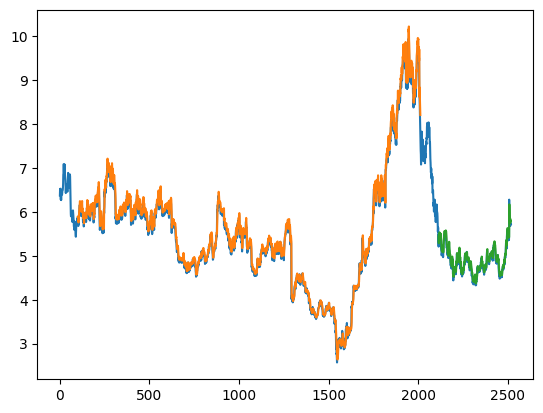

In [43]:
import matplotlib.pyplot as plt
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:


#len(test_data)

In [44]:
x_input=test_data[403:].reshape(1,-1) # previous 100 data
x_input.shape

(1, 101)

In [45]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [46]:
temp_input

[0.3346883563826705,
 0.35365852831186745,
 0.345528454627926,
 0.3509485037505537,
 0.35501357289856544,
 0.36314364658250703,
 0.3577235974598793,
 0.36178860199580903,
 0.36856369570513475,
 0.35907857743449517,
 0.35907857743449517,
 0.3563685528731813,
 0.35365852831186745,
 0.34010840550529825,
 0.3319783318213568,
 0.3238482581374152,
 0.31300815989215985,
 0.3224932135507172,
 0.308943090744148,
 0.30758811076953213,
 0.30758811076953213,
 0.30487808620821827,
 0.31300815989215985,
 0.31300815989215985,
 0.32113823357610133,
 0.31300815989215985,
 0.3157181844534736,
 0.3319783318213568,
 0.310298135330846,
 0.310298135330846,
 0.31707316442808947,
 0.31300815989215985,
 0.29132789878956694,
 0.28455286969232335,
 0.2764227960083819,
 0.2669376777377423,
 0.2682927223244403,
 0.2669376777377423,
 0.2588076040538008,
 0.26287267320181257,
 0.2669376777377423,
 0.2682927223244403,
 0.2669376777377423,
 0.2750677514216839,
 0.27777777598299763,
 0.2750677514216839,
 0.272357726860

In [58]:
# demonstrate prediction for next 10 days & refere univariate time series ipynb file to understand this
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.31300816 0.2913279  0.28455287 0.2764228  0.26693768 0.26829272
 0.26693768 0.2588076  0.26287267 0.26693768 0.26829272 0.26693768
 0.27506775 0.27777778 0.27506775 0.27235773 0.27100275 0.26287267
 0.26829272 0.26422765 0.2764228  0.28590785 0.28590785 0.2913279
 0.29539297 0.29674801 0.29539297 0.28861787 0.28726289 0.29268294
 0.30081302 0.30894309 0.31300816 0.30487809 0.30216806 0.32520324
 0.32655828 0.33062335 0.32249321 0.32791326 0.33468836 0.35636855
 0.36720872 0.37127372 0.36449869 0.3509485  0.35636855 0.38753387
 0.39837403 0.4065041  0.4065041  0.4065041  0.39295392 0.37804881
 0.37669377 0.38617889 0.38753387 0.37804881 0.38075884 0.37940379
 0.50271007 0.43089433 0.42276425 0.43495939 0.43495939 0.43089433
 0.42140921 0.43089433 0.4281843  0.42750678 0.43704012 0.44488877
 0.45369214 0.46270114 0.47187537 0.48145226 0.49155855 0.50224048
 0.51351994 0.52542686 0.53800225 0.55129319 0.56534427 0.58019632
 0.59588259 0.61243093 0.62986177 0.64818883 0.6674

7 day output [[1.1099844]]
8 day input [0.26287267 0.26693768 0.26829272 0.26693768 0.27506775 0.27777778
 0.27506775 0.27235773 0.27100275 0.26287267 0.26829272 0.26422765
 0.2764228  0.28590785 0.28590785 0.2913279  0.29539297 0.29674801
 0.29539297 0.28861787 0.28726289 0.29268294 0.30081302 0.30894309
 0.31300816 0.30487809 0.30216806 0.32520324 0.32655828 0.33062335
 0.32249321 0.32791326 0.33468836 0.35636855 0.36720872 0.37127372
 0.36449869 0.3509485  0.35636855 0.38753387 0.39837403 0.4065041
 0.4065041  0.4065041  0.39295392 0.37804881 0.37669377 0.38617889
 0.38753387 0.37804881 0.38075884 0.37940379 0.50271007 0.43089433
 0.42276425 0.43495939 0.43495939 0.43089433 0.42140921 0.43089433
 0.4281843  0.42750678 0.43704012 0.44488877 0.45369214 0.46270114
 0.47187537 0.48145226 0.49155855 0.50224048 0.51351994 0.52542686
 0.53800225 0.55129319 0.56534427 0.58019632 0.59588259 0.61243093
 0.62986177 0.64818883 0.66741693 0.68754238 0.7085498  0.7304107
 0.75308204 0.77650374 0.

15 day output [[1.2081324]]
16 day input [0.27100275 0.26287267 0.26829272 0.26422765 0.2764228  0.28590785
 0.28590785 0.2913279  0.29539297 0.29674801 0.29539297 0.28861787
 0.28726289 0.29268294 0.30081302 0.30894309 0.31300816 0.30487809
 0.30216806 0.32520324 0.32655828 0.33062335 0.32249321 0.32791326
 0.33468836 0.35636855 0.36720872 0.37127372 0.36449869 0.3509485
 0.35636855 0.38753387 0.39837403 0.4065041  0.4065041  0.4065041
 0.39295392 0.37804881 0.37669377 0.38617889 0.38753387 0.37804881
 0.38075884 0.37940379 0.50271007 0.43089433 0.42276425 0.43495939
 0.43495939 0.43089433 0.42140921 0.43089433 0.4281843  0.42750678
 0.43704012 0.44488877 0.45369214 0.46270114 0.47187537 0.48145226
 0.49155855 0.50224048 0.51351994 0.52542686 0.53800225 0.55129319
 0.56534427 0.58019632 0.59588259 0.61243093 0.62986177 0.64818883
 0.66741693 0.68754238 0.7085498  0.7304107  0.75308204 0.77650374
 0.80059743 0.82526594 0.85039157 0.87583733 0.90144956 0.92705894
 0.95248526 0.97754133 

23 day output [[1.2322383]]
24 day input [0.29539297 0.29674801 0.29539297 0.28861787 0.28726289 0.29268294
 0.30081302 0.30894309 0.31300816 0.30487809 0.30216806 0.32520324
 0.32655828 0.33062335 0.32249321 0.32791326 0.33468836 0.35636855
 0.36720872 0.37127372 0.36449869 0.3509485  0.35636855 0.38753387
 0.39837403 0.4065041  0.4065041  0.4065041  0.39295392 0.37804881
 0.37669377 0.38617889 0.38753387 0.37804881 0.38075884 0.37940379
 0.50271007 0.43089433 0.42276425 0.43495939 0.43495939 0.43089433
 0.42140921 0.43089433 0.4281843  0.42750678 0.43704012 0.44488877
 0.45369214 0.46270114 0.47187537 0.48145226 0.49155855 0.50224048
 0.51351994 0.52542686 0.53800225 0.55129319 0.56534427 0.58019632
 0.59588259 0.61243093 0.62986177 0.64818883 0.66741693 0.68754238
 0.7085498  0.7304107  0.75308204 0.77650374 0.80059743 0.82526594
 0.85039157 0.87583733 0.90144956 0.92705894 0.95248526 0.97754133
 1.00203776 1.02578735 1.04861224 1.07034779 1.09084654 1.1099844
 1.12766111 1.14380515

In [48]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)


In [49]:
len(df)

2518

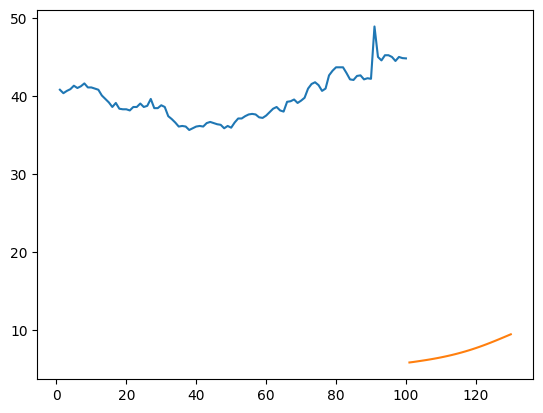

In [55]:
plt.plot(day_new,scaler.inverse_transform(df1[2418:])) #previous 100
plt.plot(day_pred,scaler.inverse_transform(lst_output))

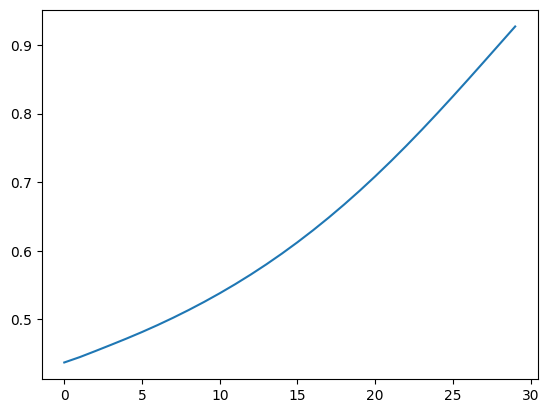

In [56]:
df2=df.tolist()
df2.extend(lst_output)
plt.plot(df2[2518:])